 <div style="text-align: center;">
    <h1><strong>Electric Vehicle Data Analysis</strong></h1>
</div>

Intern ID: IN9240233

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install bar-chart-race
import bar_chart_race as bcr

Defaulting to user installation because normal site-packages is not writeable


In [3]:
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import plotly.express as px

In [5]:
df = pd.read_csv('dataset.csv')
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

## Data Understanding

In [6]:
df.shape

# There are 112634 rows and 17 columns

(112634, 17)

In [7]:
df.isnull().sum()

# There are 20, 286, 24, 443 null values in the columns Model, Legislative District, Vehicle Location and Electric Utility respectively

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [8]:
(df.isnull().sum() / df.shape[0]) * 100

# The null value percentage for the columns are low, so we can impute it or remove the columns

VIN (1-10)                                           0.000000
County                                               0.000000
City                                                 0.000000
State                                                0.000000
Postal Code                                          0.000000
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.017757
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.253920
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.021308
Electric Utility                                     0.393309
2020 Cen

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
112629    False
112630    False
112631    False
112632    False
112633    False
Length: 112634, dtype: bool

In [10]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

There are 7 numerical columns and 10 categorical columns.

## Univariate Analysis

In [12]:
df.select_dtypes(include=np.number).columns.to_list()

['Postal Code',
 'Model Year',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 '2020 Census Tract']

<Axes: >

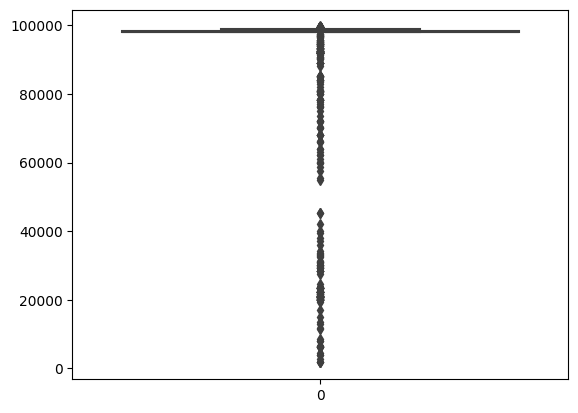

In [13]:
sns.boxplot(df['Postal Code'])

<Axes: xlabel='Postal Code', ylabel='Count'>

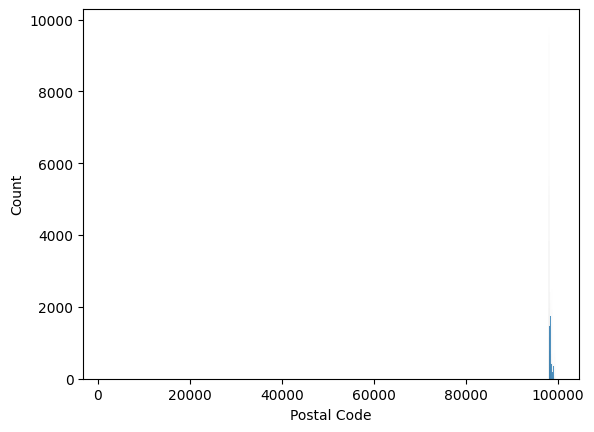

In [14]:
sns.histplot(df['Postal Code'])

<Axes: xlabel='Base MSRP', ylabel='Count'>

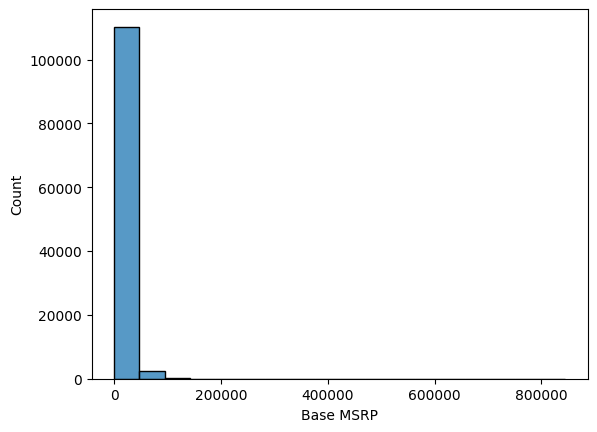

In [15]:
sns.histplot(df['Base MSRP'])

<Axes: xlabel='Electric Range', ylabel='Count'>

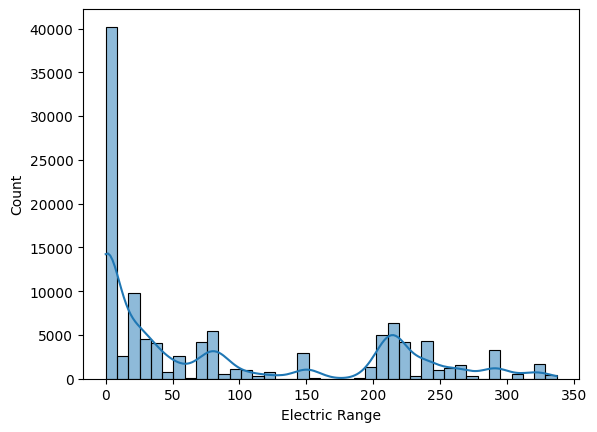

In [16]:
sns.histplot(df['Electric Range'],kde=True)

<Axes: xlabel='Electric Range', ylabel='Density'>

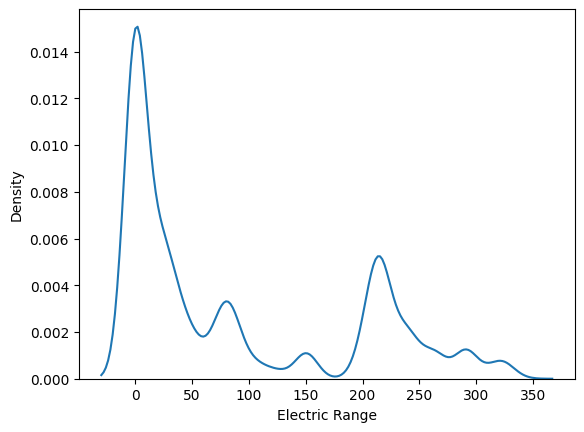

In [17]:
sns.kdeplot(df['Electric Range'])

<Axes: xlabel='Model Year', ylabel='Count'>

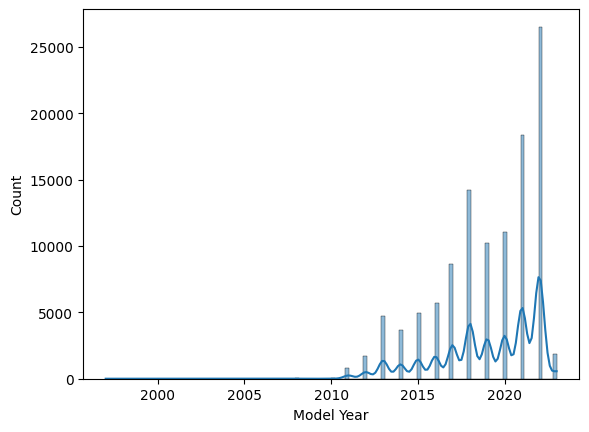

In [18]:
sns.histplot(df['Model Year'],kde=True)

<Axes: xlabel='Legislative District', ylabel='Count'>

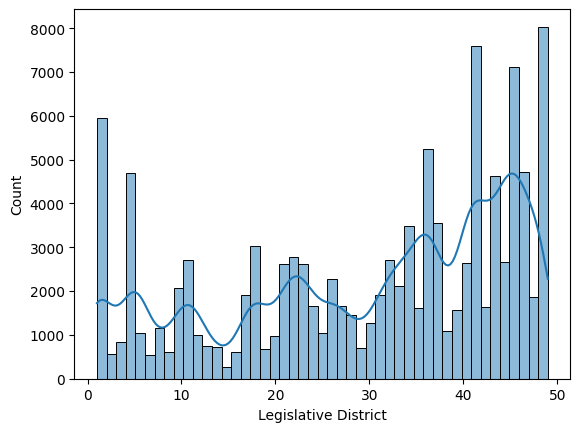

In [19]:
sns.histplot(df['Legislative District'],kde=True)

In [20]:
 num = ['Model Year',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
'DOL Vehicle ID',
 '2020 Census Tract']

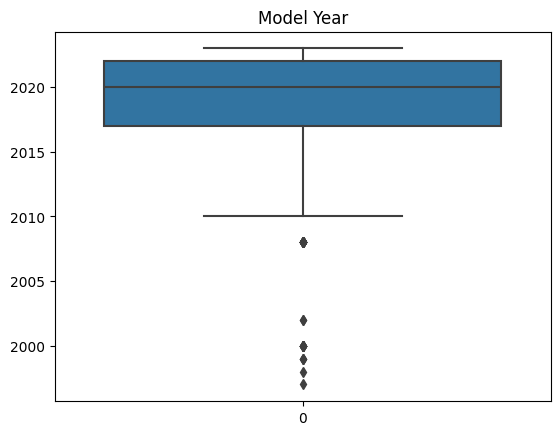

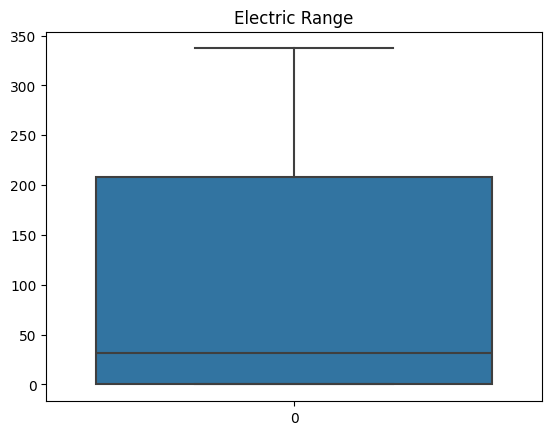

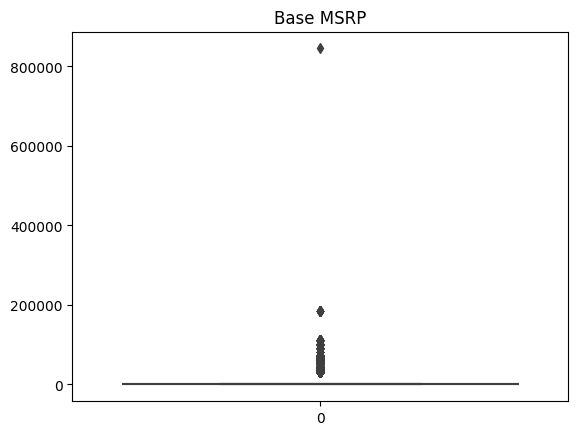

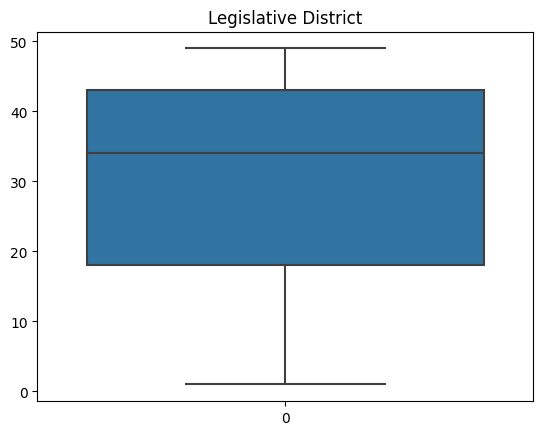

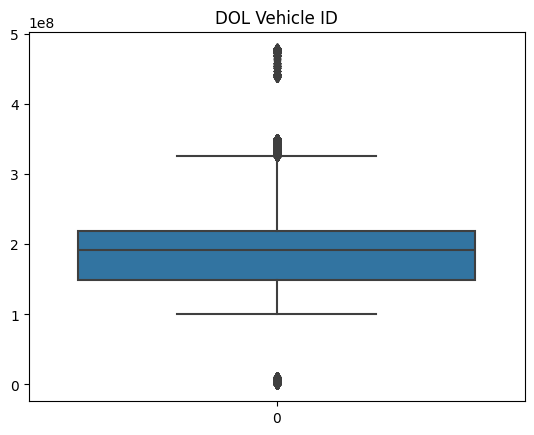

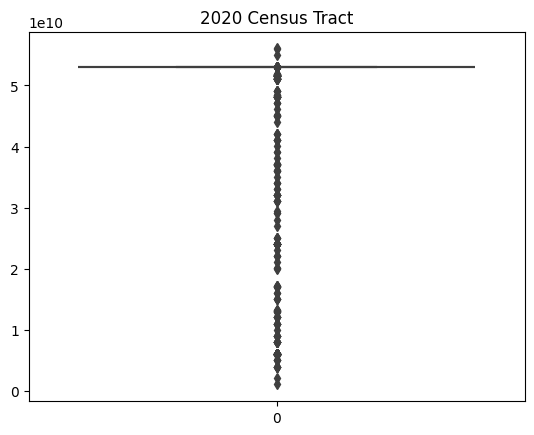

In [21]:
for i in num:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [22]:
df.select_dtypes(include='object')

VIN (1-10)     County           City State       Make       Model  \
0       JTMEB3FV6N     Monroe       Key West    FL     TOYOTA  RAV4 PRIME   
1       1G1RD6E45D      Clark       Laughlin    NV  CHEVROLET        VOLT   
2       JN1AZ0CP8B     Yakima         Yakima    WA     NISSAN        LEAF   
3       1G1FW6S08H     Skagit       Concrete    WA  CHEVROLET     BOLT EV   
4       3FA6P0SU1K  Snohomish        Everett    WA       FORD      FUSION   
...            ...        ...            ...   ...        ...         ...   
112629  7SAYGDEF2N       King         Duvall    WA      TESLA     MODEL Y   
112630  1N4BZ1CP7K   San Juan  Friday Harbor    WA     NISSAN        LEAF   
112631  1FMCU0KZ4N       King         Vashon    WA       FORD      ESCAPE   
112632  KNDCD3LD4J       King      Covington    WA        KIA        NIRO   
112633  YV4BR0CL8N       King      Covington    WA      VOLVO        XC90   

                         Electric Vehicle Type  \
0       Plug-in Hybrid Electric Vehicle (PHEV)   
1       Plug-in Hybrid Electric Vehicle (PHEV)   
2               Battery Electric Vehicle (BEV)   
3               Battery Electric Vehicle (BEV)   
4       Plug-in Hybrid Electric Vehicle (PHEV)   
...                                        ...   
112629          Battery Electric Vehicle (BEV)   
112630          Battery Electric Vehicle (BEV)   
112631  Plug-in Hybrid Electric Vehicle (PHEV)   
112632  Plug-in Hybrid Electric Vehicle (PHEV)   
112633  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  \
0                 Clean Alternative Fuel Vehicle Eligible   
1                 Clean Alternative Fuel Vehicle Eligible   
2                 Clean Alternative Fuel Vehicle Eligible   
3                 Clean Alternative Fuel Vehicle Eligible   
4                   Not eligible due to low battery range   
...                                                   ...   
112629  Eligibility unknown as battery range has not b...   
112630            Clean Alternative Fuel Vehicle Eligible   
112631            Clean Alternative Fuel Vehicle Eligible   
112632              Not eligible due to low battery range   
112633              Not eligible due to low battery range   

                   Vehicle Location  \
0         POINT (-81.80023 24.5545)   
1       POINT (-114.57245 35.16815)   
2       POINT (-120.50721 46.60448)   
3        POINT (-121.7515 48.53892)   
4       POINT (-122.20596 47.97659)   
...                             ...   
112629  POINT (-121.98609 47.74068)   
112630  POINT (-123.01648 48.53448)   
112631   POINT (-122.4573 47.44929)   
112632  POINT (-122.09124 47.33778)   
112633  POINT (-122.09124 47.33778)   

                                         Electric Utility  
0                                                     NaN  
1                                                     NaN  
2                                              PACIFICORP  
3                                  PUGET SOUND ENERGY INC  
4                                  PUGET SOUND ENERGY INC  
...                                                   ...  
112629      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
112630  BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...  
112631      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
112632      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
112633      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  

[112634 rows x 10 columns]

In [23]:
df.select_dtypes(include='object').columns.to_list()

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Vehicle Location',
 'Electric Utility']

In [24]:
df['VIN (1-10)'].value_counts().head(50)

5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
7SAYGDEEXN    430
5YJYGDEEXM    428
5YJYGDEE6M    421
5YJYGDEE3M    418
7SAYGDEE8N    416
5YJYGDEE4M    416
5YJYGDEE1M    410
7SAYGDEE4N    408
5YJYGDEE5M    405
7SAYGDEE1N    392
7SAYGDEE9N    389
7SAYGDEE5N    388
7SAYGDEE2N    385
7SAYGDEE7N    384
7SAYGDEE3N    383
7SAYGDEE6N    375
7SAYGDEE0N    373
5YJ3E1EB0N    349
5YJ3E1EBXN    338
5YJ3E1EB2N    336
5YJ3E1EB5N    333
5YJ3E1EB7N    330
5YJ3E1EB4N    324
5YJ3E1EB6J    321
5YJ3E1EBXJ    321
5YJ3E1EB4J    316
5YJ3E1EB9N    313
5YJ3E1EB3J    311
5YJ3E1EB1J    310
5YJ3E1EB0J    310
5YJ3E1EB1N    310
5YJ3E1EB5J    310
5YJ3E1EB8N    305
5YJ3E1EB3N    305
5YJ3E1EB6N    300
5YJ3E1EB8J    299
5YJ3E1EB2J    291
5YJ3E1EB9J    283
5YJ3E1EA1J    274
5YJ3E1EB7J    272
5YJ3E1EA0J    265
5YJ3E1EA5J    261
5YJ3E1EA3J    261
5YJ3E1EA7J    252
5YJ3E1EA9J    249
Name: VIN (1-10), dtype: int64

In [25]:
df['VIN (1-10)'].value_counts().tail(20)

WAUMPBFF8G    1
WP0AD2A7XF    1
JTJHKCFZ5N    1
WA1J2BFZ3N    1
7JRBR0FL4L    1
WA1G2BFZ2N    1
YV4BR0CK1N    1
KMHE54L22H    1
WP1AE2AYXN    1
WBA33AG03M    1
SADHW2S15M    1
WA1M2BFZ2N    1
SALGS4RY0M    1
WA11AAGEXN    1
YV4BK0DP2L    1
WA1LAAGE9M    1
5UXKT0C50H    1
5YJYGAED3M    1
WDC0G5DBXL    1
YV4ED3GM0P    1
Name: VIN (1-10), dtype: int64

<Axes: >

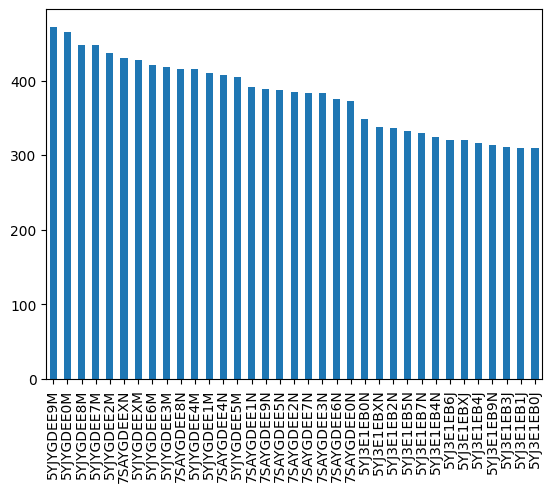

In [26]:
df['VIN (1-10)'].value_counts().head(35).plot(kind='bar')

In [27]:
df['County'].value_counts().head(50)

King                    59000
Snohomish               12434
Pierce                   8535
Clark                    6689
Thurston                 4126
Kitsap                   3847
Whatcom                  2840
Spokane                  2792
Benton                   1376
Island                   1307
Skagit                   1258
Clallam                   731
San Juan                  721
Jefferson                 699
Chelan                    654
Yakima                    617
Cowlitz                   569
Mason                     547
Lewis                     431
Grays Harbor              403
Kittitas                  392
Franklin                  365
Grant                     335
Walla Walla               312
Douglas                   227
Whitman                   177
Klickitat                 175
Okanogan                  149
Pacific                   147
Stevens                   142
Skamania                  139
Asotin                     48
Wahkiakum                  39
Adams     

In [28]:
df['County'].value_counts().tail(20)

Palm Beach              1
Okaloosa                1
Bell                    1
Denton                  1
Hillsborough            1
Louisa                  1
Suffolk                 1
Galveston               1
Danville                1
Chaves                  1
Sheridan                1
Rock Island             1
Fairbanks North Star    1
Santa Barbara           1
Wayne                   1
Pinal                   1
Elmore                  1
Portsmouth              1
Kings                   1
Kootenai                1
Name: County, dtype: int64

<Axes: >

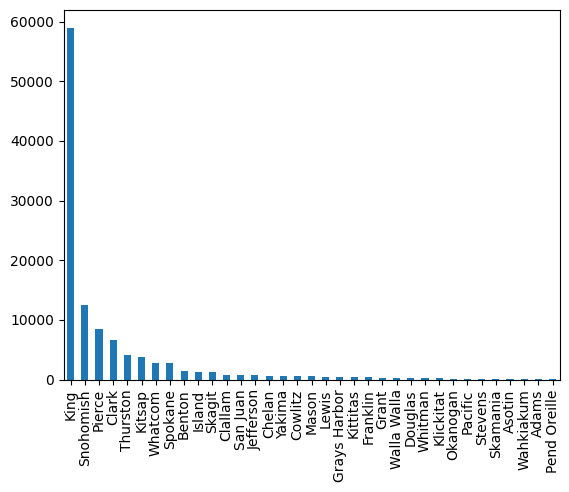

In [29]:
df['County'].value_counts().head(35).plot(kind='bar')

In [30]:
df['City'].value_counts().head(50)

Seattle              20305
Bellevue              5921
Redmond               4201
Vancouver             4013
Kirkland              3598
Bothell               3335
Sammamish             3292
Renton                2778
Olympia               2745
Tacoma                2379
Bellingham            1952
Issaquah              1789
Spokane               1677
Mercer Island         1639
Kent                  1610
Woodinville           1599
Everett               1477
Lynnwood              1468
Snohomish             1324
Edmonds               1280
Gig Harbor            1266
Shoreline             1256
Bainbridge Island     1236
Auburn                1173
Camas                 1020
Federal Way            853
Maple Valley           824
Bremerton              805
Seatac                 798
Lake Stevens           756
Marysville             692
Puyallup               684
Kenmore                682
Port Orchard           645
Richland               588
Bonney Lake            586
Lacey                  570
K

In [31]:
df['City'].value_counts().tail(20)

Lompoc              1
Alhambra            1
Walla Walla Co      1
Fairbanks           1
Cupertino           1
Indian Wells        1
Hunters             1
Beaver              1
Elkton              1
Grays River         1
West Valley City    1
Odessa              1
Roswell             1
Potomac             1
Amanda Park         1
Hartline            1
Gaithersburg        1
El Paso             1
Klickitat           1
Worley              1
Name: City, dtype: int64

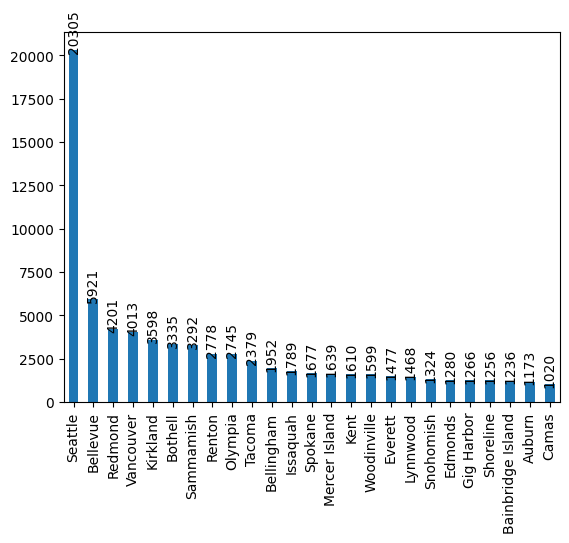

In [32]:
cc = df['City'].value_counts().head(25)
cc.plot(kind='bar')
for i,j in enumerate(cc):
    plt.text(i, j+0.5, str(j), ha='center',rotation=90)

In [33]:
df['State'].value_counts()

WA    112348
CA        76
VA        36
MD        26
TX        14
CO         9
NV         8
GA         7
NC         7
CT         6
DC         6
FL         6
AZ         6
IL         6
SC         5
OR         5
NE         5
HI         4
UT         4
AR         4
NY         4
TN         3
KS         3
MO         3
PA         3
MA         3
LA         3
NJ         3
NH         2
OH         2
WY         2
ID         2
KY         1
RI         1
ME         1
MN         1
SD         1
WI         1
NM         1
AK         1
MS         1
AL         1
DE         1
OK         1
ND         1
Name: State, dtype: int64

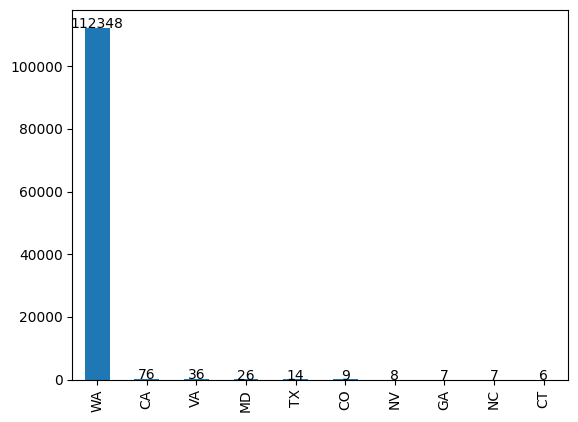

In [34]:
sc = df['State'].value_counts().head(10)
sc.plot(kind='bar')
for index, value in enumerate(sc):
    plt.text(index, value+0.5, str(value), ha='center')

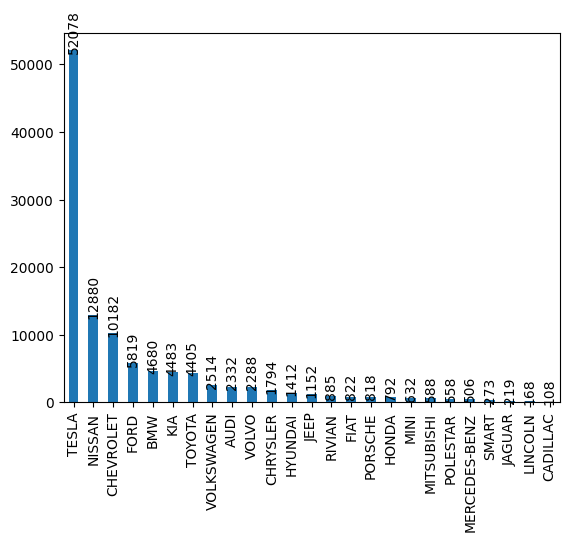

In [35]:
cc = df['Make'].value_counts().head(25)
cc.plot(kind='bar')
for i,j in enumerate(cc):
    plt.text(i, j+0.5, str(j), ha='center',rotation=90)

In [36]:
df['Make'].value_counts().tail(10)

CADILLAC          108
LUCID MOTORS       65
SUBARU             59
LAND ROVER         38
LEXUS              33
FISKER             20
GENESIS            18
AZURE DYNAMICS      7
TH!NK               3
BENTLEY             3
Name: Make, dtype: int64

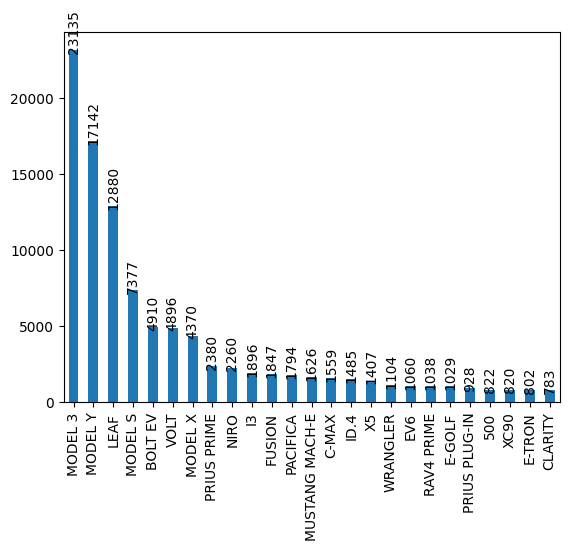

In [37]:
mc = df['Model'].value_counts().head(25)
mc.plot(kind='bar')
for i,j in enumerate(mc):
    plt.text(i,j+0.5,str(j),ha='center',rotation=90)

In [38]:
df['Model'].value_counts().tail(10)

TRANSIT CONNECT ELECTRIC    7
G80                         5
A8 E                        3
CITY                        3
BENTAYGA                    2
745LE                       2
S-10 PICKUP                 1
SOLTERRA                    1
918                         1
FLYING SPUR                 1
Name: Model, dtype: int64

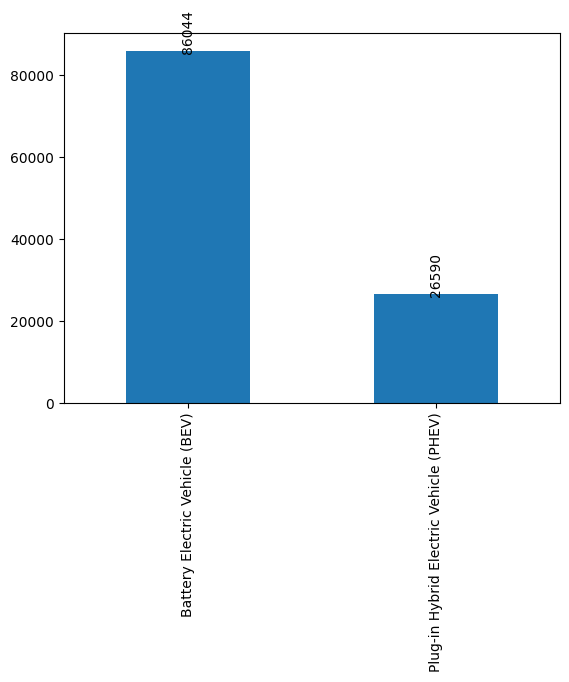

In [39]:
ec = df['Electric Vehicle Type'].value_counts()
ec.plot(kind='bar')
for i,j in enumerate(ec):
    plt.text(i,j+0.5,str(j),ha='center',rotation=90)

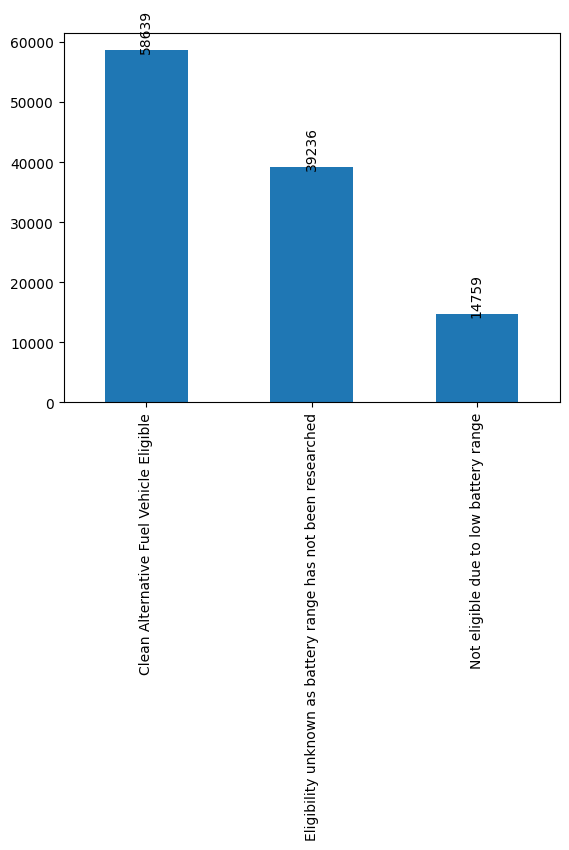

In [40]:
cac = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
cac.plot(kind='bar')
for i,j in enumerate(cac):
    plt.text(i,j+0.5,str(j),ha='center',rotation=90)

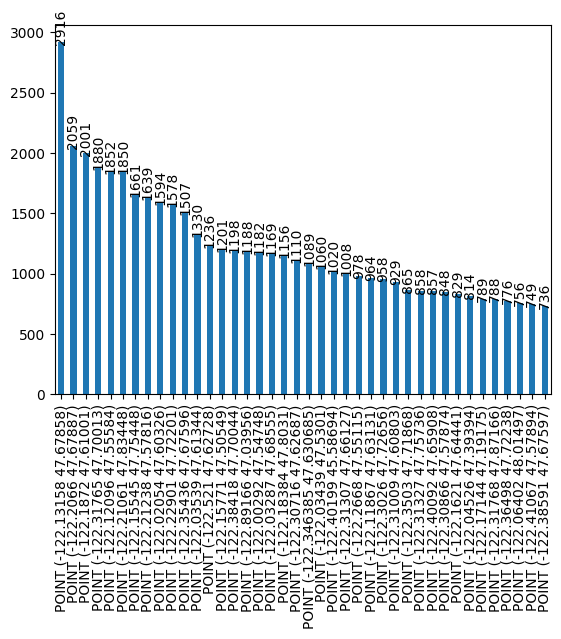

In [41]:
vc = df['Vehicle Location'].value_counts().head(40)
vc.plot(kind='bar')
for i,j in enumerate(vc):
    plt.text(i,j+0.5,str(j),ha='center',rotation=90)

In [42]:
df['Vehicle Location'].value_counts().tail(20)

POINT (-121.92442 36.55443)    1
POINT (-104.83531 38.9291)     1
POINT (-77.95024 35.37084)     1
POINT (-122.2962 37.85103)     1
POINT (-111.85047 33.25707)    1
POINT (-120.45788 34.64048)    1
POINT (-118.12778 34.09442)    1
POINT (-98.67331 29.49379)     1
POINT (-118.01268 33.83899)    1
POINT (-147.72213 64.84527)    1
POINT (-122.02929 37.31913)    1
POINT (-116.33881 33.72413)    1
POINT (-118.20299 48.11777)    1
POINT (-119.05072 34.2234)     1
POINT (-90.57607 41.51196)     1
POINT (-124.33152 48.05431)    1
POINT (-77.41203 39.41574)     1
POINT (-123.61022 46.35588)    1
POINT (-112.04165 40.68741)    1
POINT (-116.91895 47.40077)    1
Name: Vehicle Location, dtype: int64

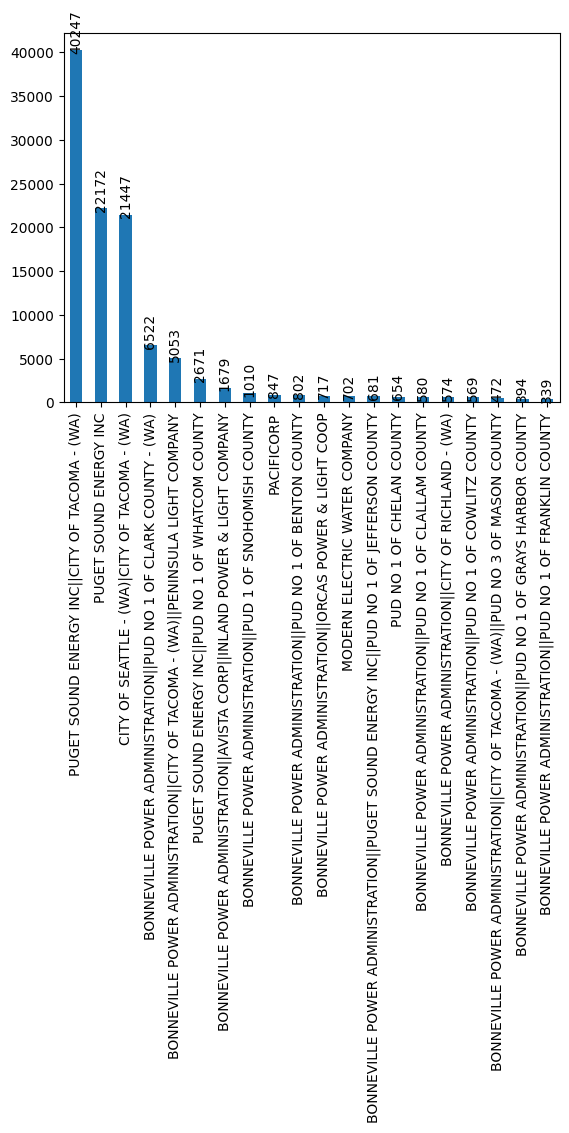

In [43]:
euc = df['Electric Utility'].value_counts().head(20)
euc.plot(kind='bar')
for i,j in enumerate(euc):
    plt.text(i,j+0.5,str(j),ha='center',rotation=90)

In [44]:
df['Electric Utility'].value_counts().tail(20)

BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||BENTON RURAL ELECTRIC ASSN|PENINSULA LIGHT COMPANY    23
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF FERRY COUNTY                                                     18
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF MASON COUNTY|PUD NO 1 OF JEFFERSON COUNTY                        16
BONNEVILLE POWER ADMINISTRATION||COLUMBIA RURAL ELEC ASSN, INC                                                15
BONNEVILLE POWER ADMINISTRATION||PACIFICORP||COLUMBIA RURAL ELEC ASSN, INC                                    13
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF KITTITAS COUNTY                                                  13
BONNEVILLE POWER ADMINISTRATION||TOWN OF EATONVILLE - (WA)|CITY OF TACOMA - (WA)                              13
CITY OF TACOMA - (WA)                                                                                         11
BONNEVILLE POWER ADMINISTRATION||CITY OF MCCLEARY - (WA)                                        

## Bivariate Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [46]:
df['MC']=df['Model Year'].astype(object)

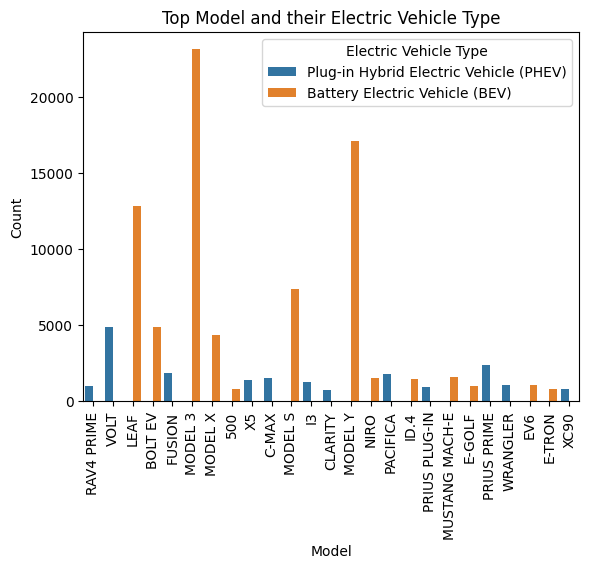

In [47]:
topme = df.groupby(['Model', 'Electric Vehicle Type']).size().nlargest(25).index

topmedf = df[df.set_index(['Model', 'Electric Vehicle Type']).index.isin(topme)]

sns.countplot(data=topmedf, x='Model', hue='Electric Vehicle Type')

plt.title('Top Model and their Electric Vehicle Type')
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Count')

plt.show()

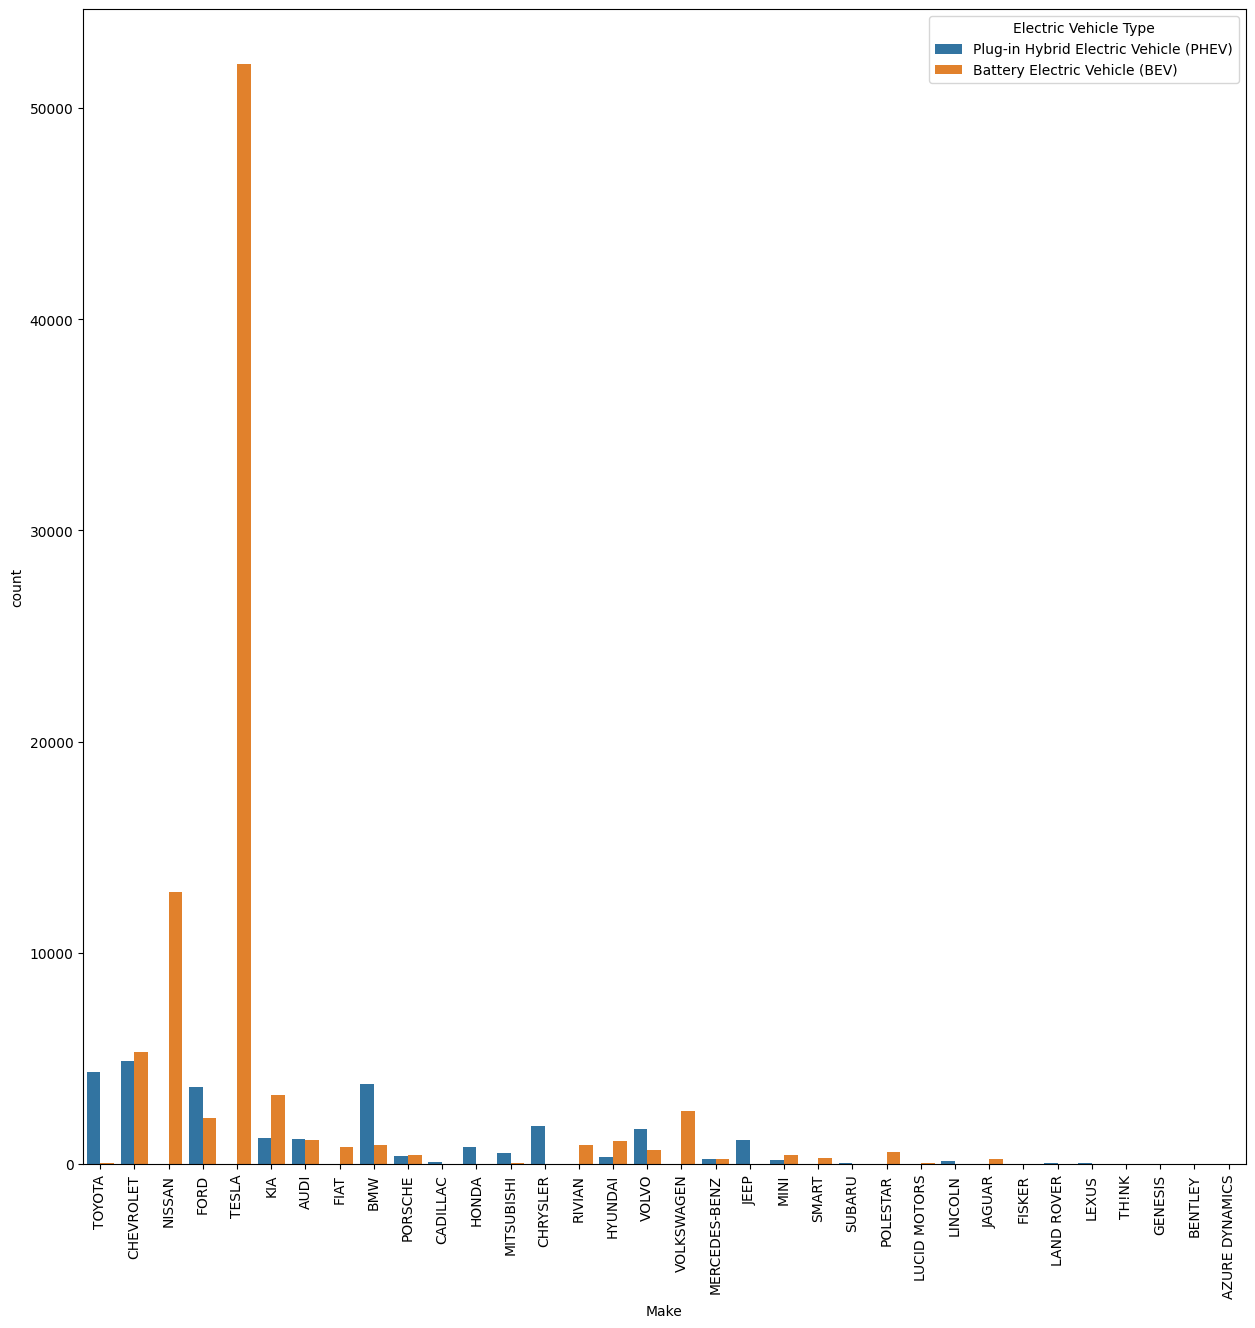

In [48]:
plt.figure(figsize=[15,15])
sns.countplot(data=df,x='Make',hue='Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

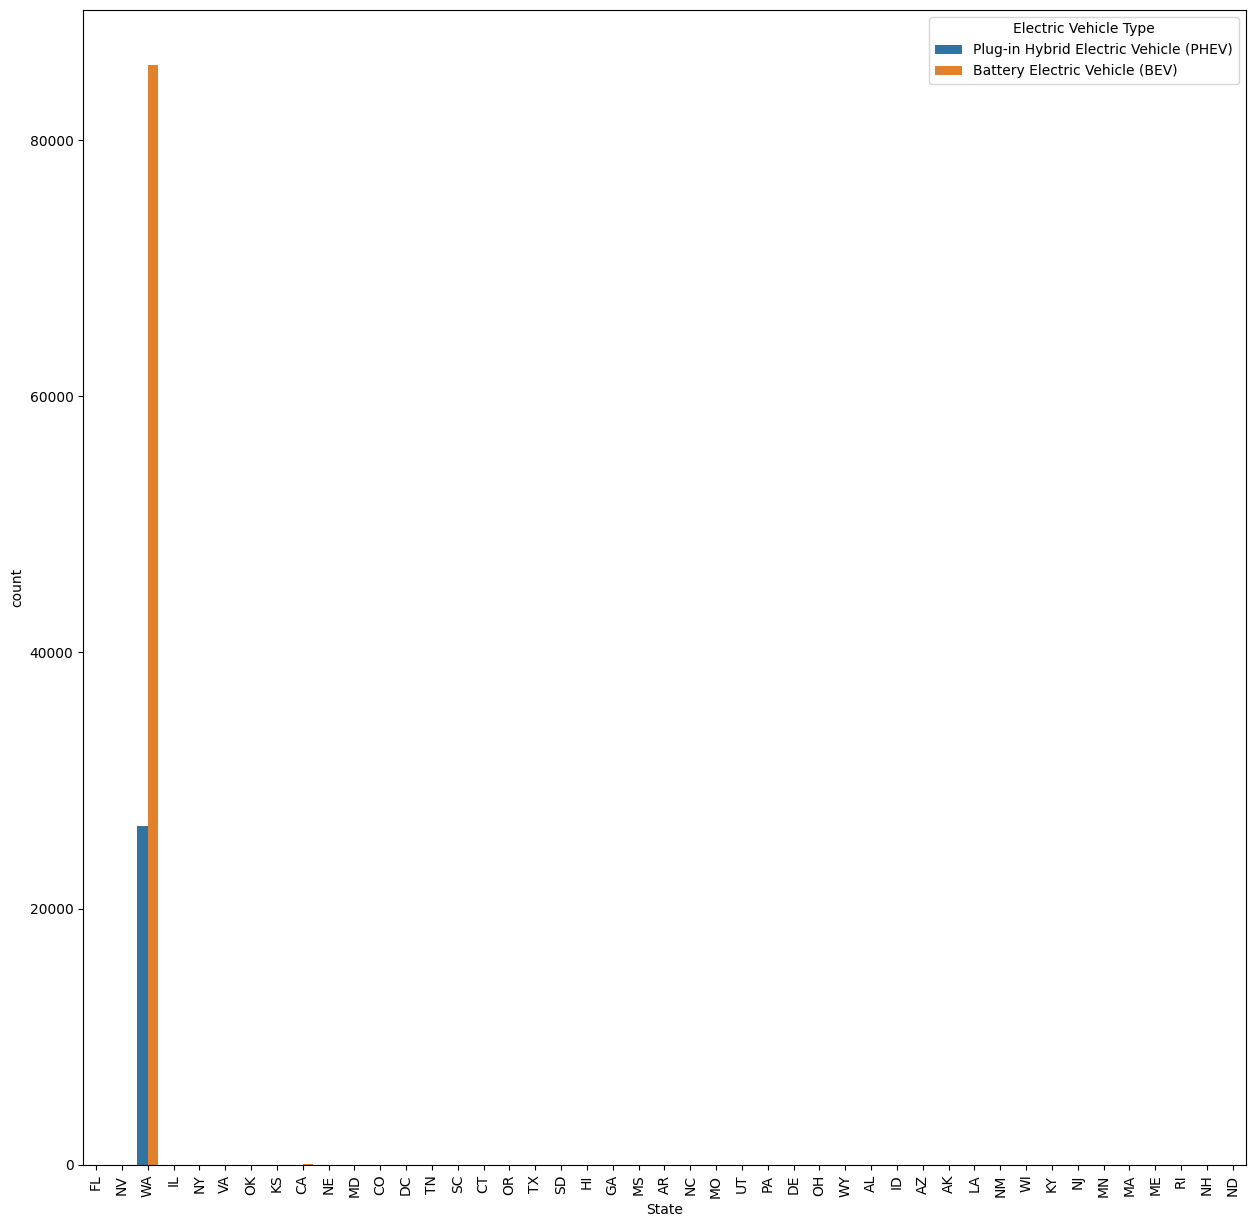

In [49]:
plt.figure(figsize=[15,15])
sns.countplot(data=df,x='State',hue='Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

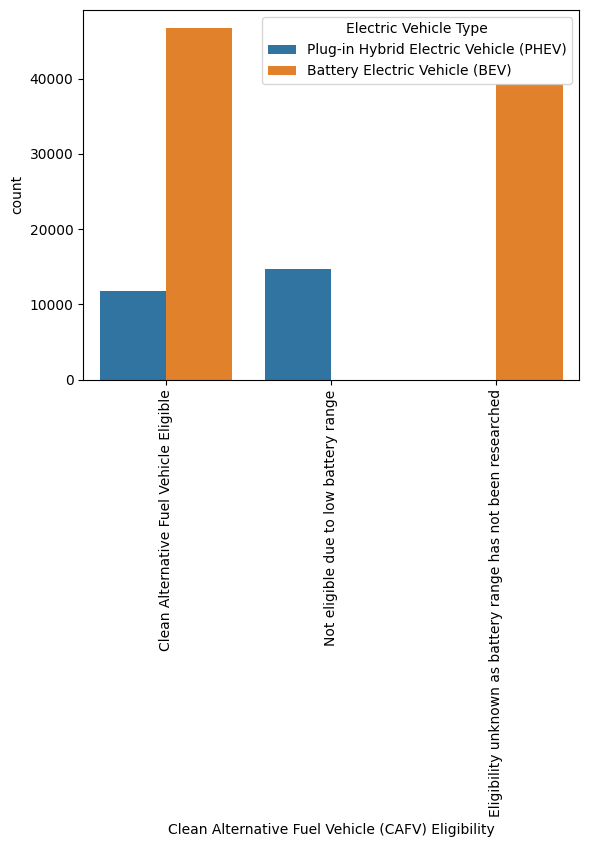

In [50]:
#plt.figure(figsize=[15,10])
sns.countplot(data=df,x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',hue='Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

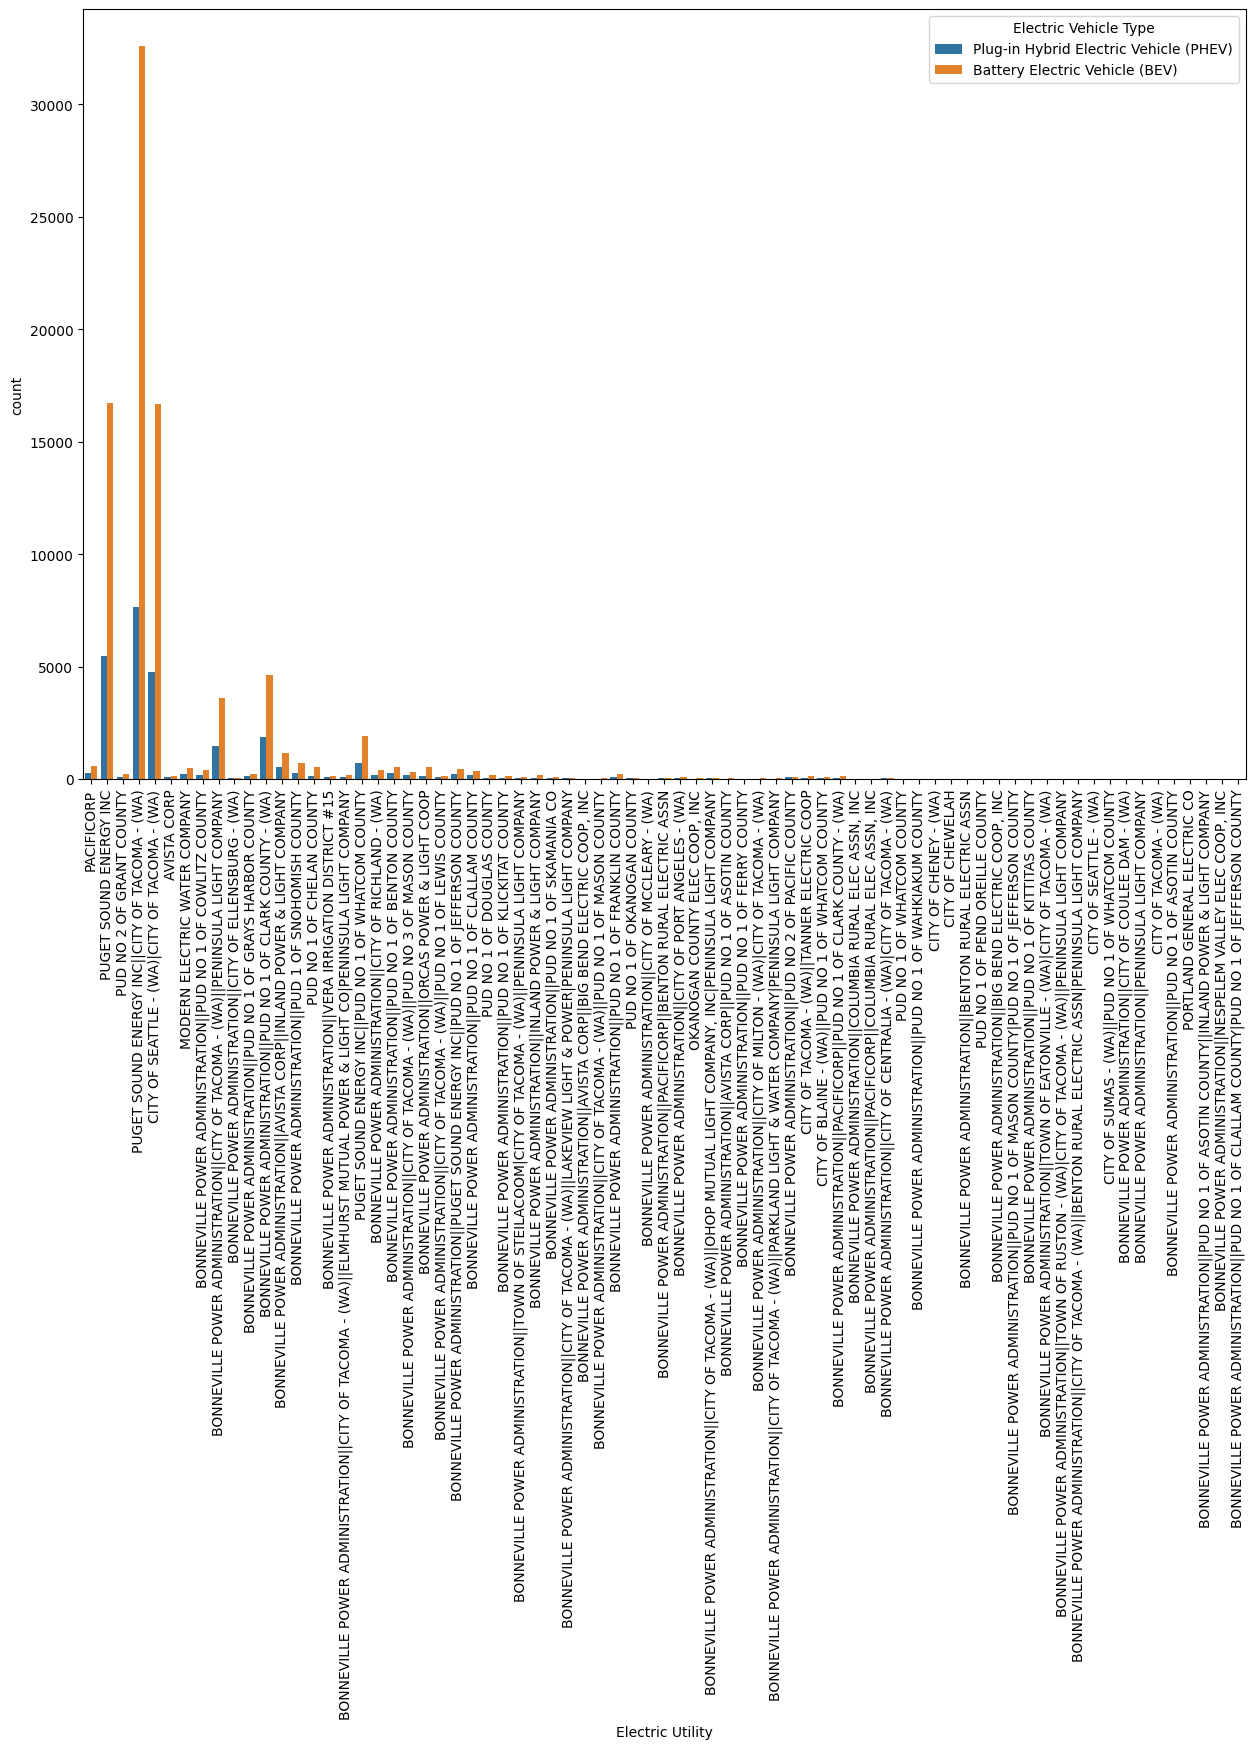

In [51]:
plt.figure(figsize=[15,10])
sns.countplot(data=df,x='Electric Utility',hue='Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

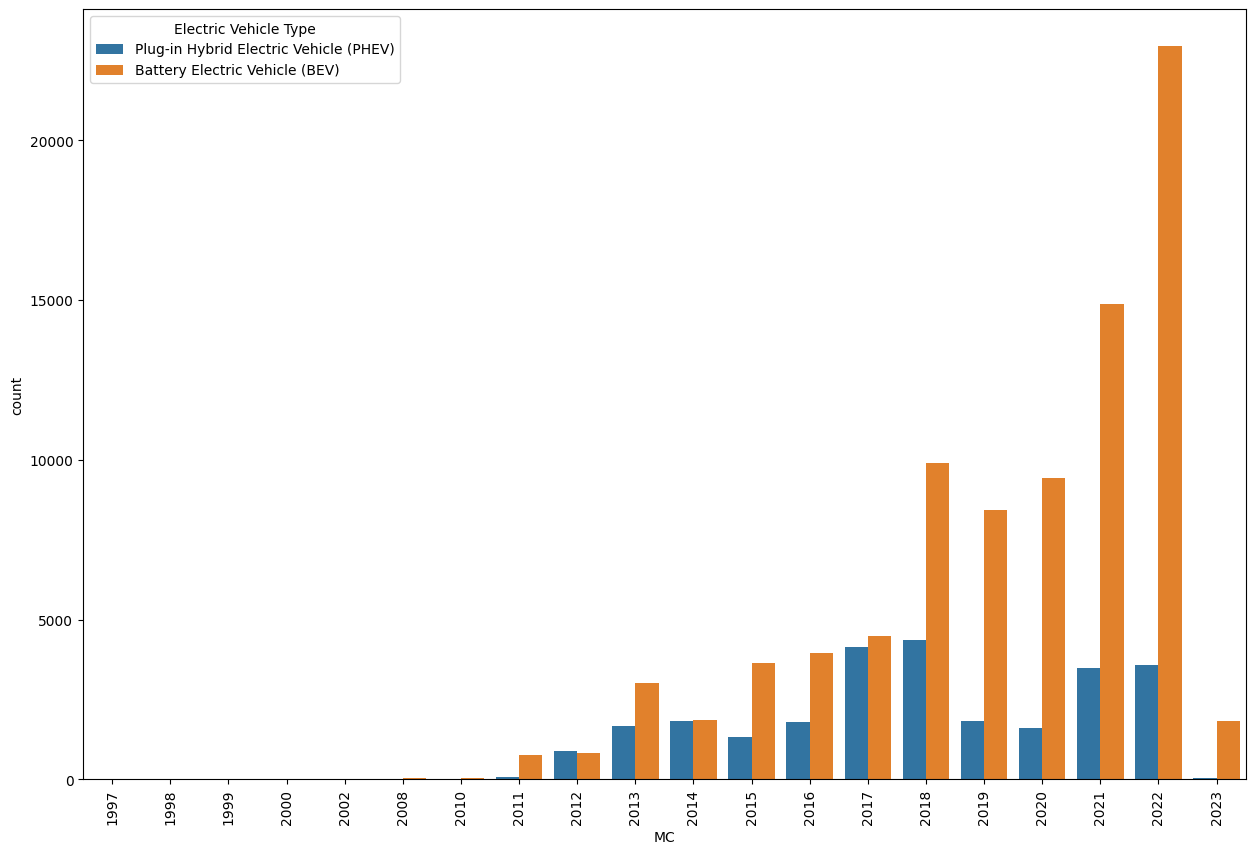

In [52]:
plt.figure(figsize=[15,10])
sns.countplot(data=df,x='MC',hue='Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

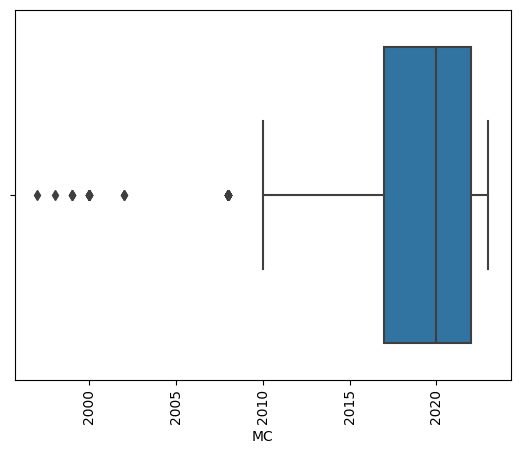

In [53]:
#plt.figure(figsize=[15,10])
sns.boxplot(data=df,x='MC',hue='Electric Range')
plt.xticks(rotation=90)
plt.show()

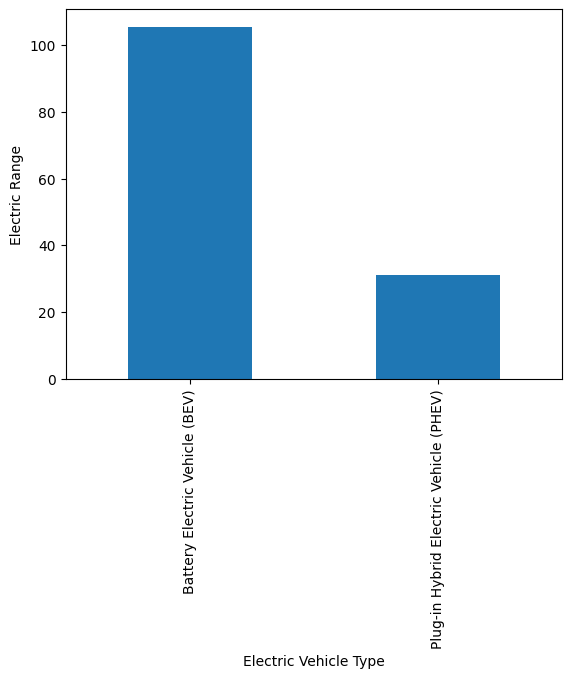

In [54]:
df.groupby(by=['Electric Vehicle Type'])['Electric Range'].mean().plot(kind='bar')
plt.ylabel('Electric Range')
plt.show()

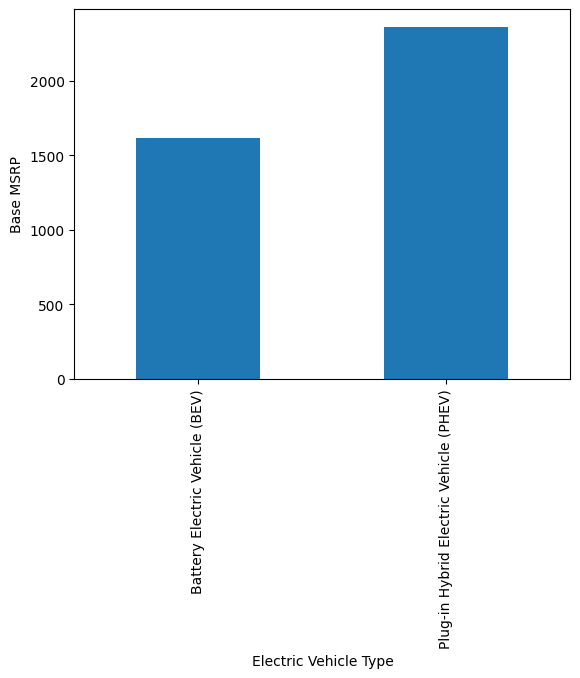

In [55]:
df.groupby(by=['Electric Vehicle Type'])['Base MSRP'].mean().plot(kind='bar')
plt.ylabel('Base MSRP')
plt.show()

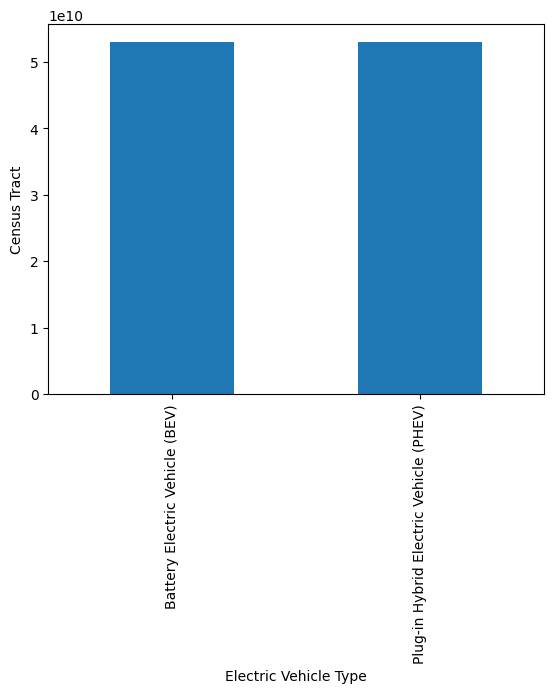

In [56]:
df.groupby(by=['Electric Vehicle Type'])['2020 Census Tract'].mean().plot(kind='bar')
plt.ylabel('Census Tract')
plt.show()

<Axes: xlabel='Electric Range', ylabel='Base MSRP'>

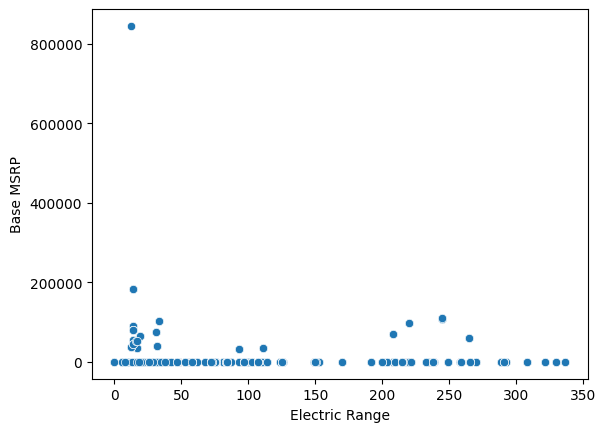

In [57]:
sns.scatterplot(df,x='Electric Range',y='Base MSRP')

## Advanced Visualization

***Create a Choropleth using plotly.express to display the number of EV vehicles based on location.***

In [58]:
ev_counts_by_state = df.groupby('State').size().reset_index(name='ev_count')

fig = px.choropleth(ev_counts_by_state,
                    locations='State', 
                    locationmode='USA-states',  
                    color='ev_count',  
                    hover_name='State', 
                    color_continuous_scale='Viridis', 
                    scope='usa',
                    title='Number of Electric Vehicles by State')

# Show the map
fig.show()

***Create a Racing Bar Plot to display the animation of EV Make and its count each year.***

In [59]:
pd.set_option('display.max_rows', None)

In [60]:
df.groupby(by='MC')['Make'].value_counts()

MC    Make          
1997  CHEVROLET             1
1998  FORD                  1
1999  FORD                  3
2000  FORD                 10
2002  TOYOTA                2
2008  TESLA                23
2010  TESLA                24
2011  NISSAN              755
      CHEVROLET            71
      TESLA                 7
      AZURE DYNAMICS        4
      TH!NK                 3
2012  NISSAN              610
      CHEVROLET           496
      TOYOTA              385
      TESLA               134
      MITSUBISHI           42
      FISKER               20
      FORD                 15
      AZURE DYNAMICS        3
2013  NISSAN             1966
      CHEVROLET           818
      TESLA               814
      FORD                662
      TOYOTA              296
      FIAT                106
      SMART                29
2014  CHEVROLET           724
      NISSAN              694
      TESLA               683
      FORD                628
      BMW                 457
      TOYOTA       

In [63]:
ev_count_year = df.groupby(by='MC')['Make'].value_counts().reset_index(name='ev_count')

unique_makers = df['Make'].unique()

all_years = pd.DataFrame({'MC':sorted(df['MC'].unique())})
all_combo= all_years.assign(key=1).merge(pd.DataFrame({'Make':unique_makers, 'key':1}), on='key').drop('key', axis=1)
evfull = all_combo.merge(ev_count_year, on=['MC','Make'], how='left').fillna(0)
evfull['ev_count'] = evfull['ev_count'].astype(int)

fig = px.bar(evfull,
             x='ev_count', 
             y='Make',  
             color='Make',  
             text='ev_count',  
             animation_frame='MC',  
             orientation='h',  
             title='EV Count by Make (Yearly)',
             range_x=[0, ev_count_year['ev_count'].max() * 1.1],  
             labels={'ev_count': 'Count of EVs', 'Make': 'EV Make'})  

fig.update_traces(texttemplate='%{text}', textposition='outside')  
fig.show()

## Analysis Questions

**1. Which State has the highest number of EV?**

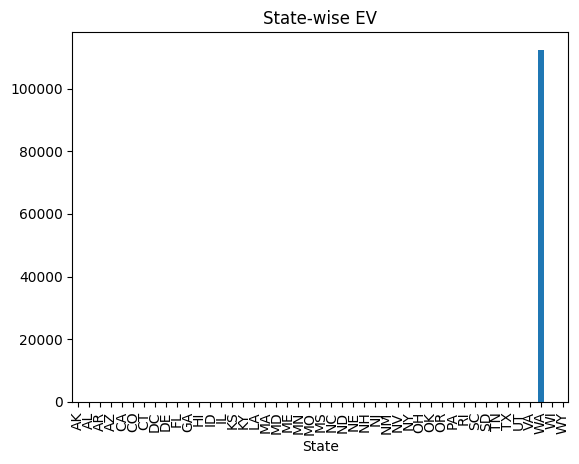

In [64]:
df.groupby(by=['State'])['Electric Vehicle Type'].count().plot(kind='bar')
plt.title('State-wise EV')
plt.show()

In [65]:
df['State'].value_counts()

WA    112348
CA        76
VA        36
MD        26
TX        14
CO         9
NV         8
GA         7
NC         7
CT         6
DC         6
FL         6
AZ         6
IL         6
SC         5
OR         5
NE         5
HI         4
UT         4
AR         4
NY         4
TN         3
KS         3
MO         3
PA         3
MA         3
LA         3
NJ         3
NH         2
OH         2
WY         2
ID         2
KY         1
RI         1
ME         1
MN         1
SD         1
WI         1
NM         1
AK         1
MS         1
AL         1
DE         1
OK         1
ND         1
Name: State, dtype: int64

Washington state is the most EV utilized State.

**2. Which Year EV has been produced most?**

In [66]:
df.groupby(by='MC')['Electric Vehicle Type'].count().sort_values(ascending=False)

MC
2022    26530
2021    18364
2018    14246
2020    11038
2019    10266
2017     8644
2016     5735
2015     4940
2013     4691
2014     3685
2023     1886
2012     1705
2011      840
2010       24
2008       23
2000       10
1999        3
2002        2
1998        1
1997        1
Name: Electric Vehicle Type, dtype: int64

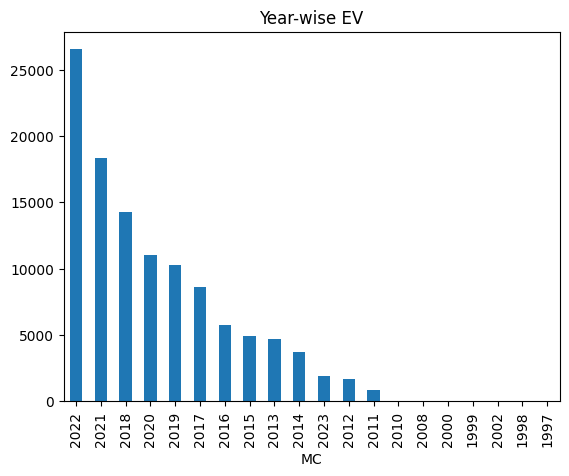

In [67]:
df.groupby(by='MC')['Electric Vehicle Type'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Year-wise EV')
plt.show()

2022 is the year with the most number of EV produced with a count of 26530.

**3. Is there a relationship between Electric Range and Electric Vehicle Type?**

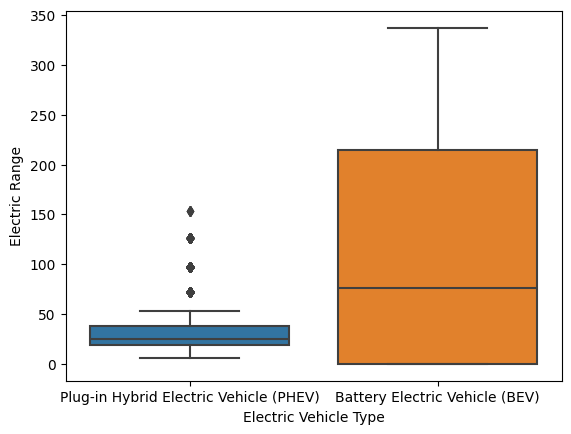

In [68]:
sns.boxplot(data=df,x='Electric Vehicle Type',y='Electric Range')
plt.show()

Yes, There is a relationship between Electric Vehicle Type and Electric Range.

**4. Is there a relationship between Clean Alternative Fuel Vehicle (CAFV) Eligibility and Base MSRP?** 

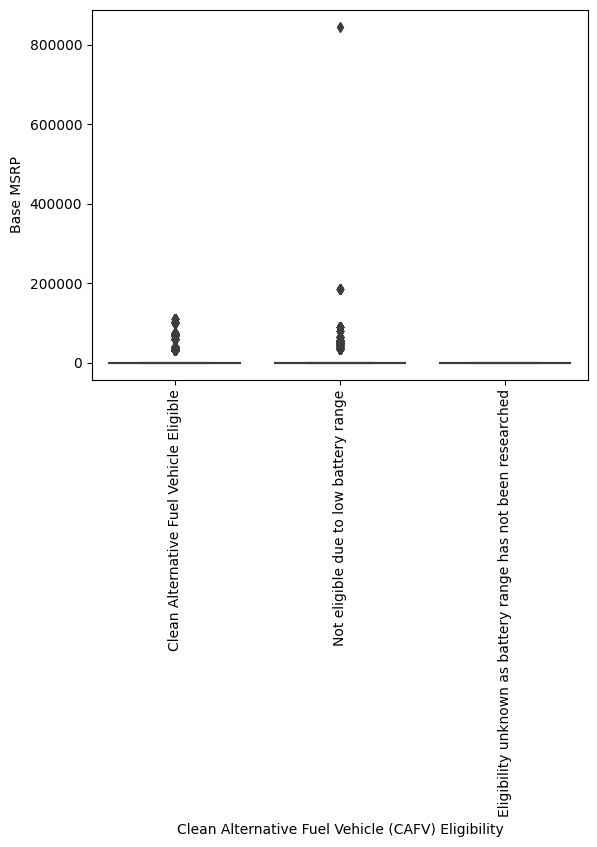

In [69]:
sns.boxplot(data=df,x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Base MSRP')
plt.xticks(rotation=90)
plt.show()

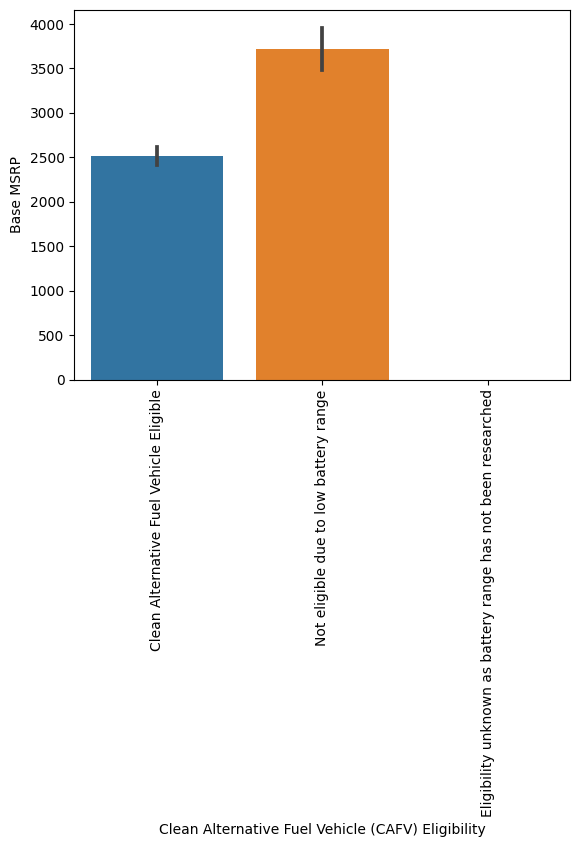

In [70]:
sns.barplot(data=df,x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Base MSRP')
plt.xticks(rotation=90)
plt.show()

Yes, There is a relationship between CAFV Eligibility and Base MSRP.

**5. What is the costliest EV Price and most affordable EV Price with the Model, Make and Model Year based on the data?**

In [71]:
df['Base MSRP'].max()

845000

In [72]:
df['Base MSRP'].min()

0

In [73]:
df['Base MSRP'].loc[df['Base MSRP']>0].sort_values()

9          31950
59150      31950
59156      31950
59237      31950
59578      31950
60088      31950
60314      31950
11232      31950
60622      31950
60804      31950
11118      31950
60898      31950
61029      31950
61032      31950
61038      31950
61060      31950
61069      31950
10879      31950
10875      31950
61338      31950
61802      31950
10851      31950
10776      31950
62411      31950
62418      31950
62867      31950
58941      31950
58605      31950
58046      31950
11719      31950
50665      31950
50991      31950
51139      31950
51380      31950
51438      31950
51832      31950
51951      31950
52032      31950
53562      31950
53568      31950
54419      31950
54467      31950
62919      31950
54574      31950
54694      31950
55461      31950
55753      31950
55802      31950
55847      31950
56159      31950
56275      31950
57296      31950
57470      31950
57506      31950
57524      31950
57563      31950
54622      31950
10638      31950
63091      319

In [74]:
df[['Base MSRP','Model','Model Year','Make']].loc[df['Base MSRP']==df['Base MSRP'].max()]

Base MSRP Model  Model Year     Make
62533     845000   918        2015  PORSCHE

In [75]:
df[['Base MSRP','Model','Model Year','Make']].loc[df['Base MSRP']==31950]

Base MSRP Model  Model Year Make
9           31950  SOUL        2016  KIA
511         31950  SOUL        2016  KIA
592         31950  SOUL        2016  KIA
618         31950  SOUL        2016  KIA
781         31950  SOUL        2016  KIA
1432        31950  SOUL        2016  KIA
2469        31950  SOUL        2016  KIA
2519        31950  SOUL        2016  KIA
2708        31950  SOUL        2016  KIA
3024        31950  SOUL        2016  KIA
3066        31950  SOUL        2016  KIA
3495        31950  SOUL        2016  KIA
3717        31950  SOUL        2016  KIA
3793        31950  SOUL        2016  KIA
3950        31950  SOUL        2016  KIA
4421        31950  SOUL        2016  KIA
4595        31950  SOUL        2016  KIA
5461        31950  SOUL        2016  KIA
5487        31950  SOUL        2016  KIA
5681        31950  SOUL        2016  KIA
6100        31950  SOUL        2016  KIA
6209        31950  SOUL        2016  KIA
6258        31950  SOUL        2016  KIA
6628        31950  SOUL        2016  KIA
6714        31950  SOUL        2016  KIA
6815        31950  SOUL        2016  KIA
6953        31950  SOUL        2016  KIA
7746        31950  SOUL        2016  KIA
7926        31950  SOUL        2016  KIA
8013        31950  SOUL        2016  KIA
8723        31950  SOUL        2016  KIA
8739        31950  SOUL        2016  KIA
8813        31950  SOUL        2016  KIA
8916        31950  SOUL        2016  KIA
9279        31950  SOUL        2016  KIA
9585        31950  SOUL        2016  KIA
10171       31950  SOUL        2016  KIA
10402       31950  SOUL        2016  KIA
10638       31950  SOUL        2016  KIA
10776       31950  SOUL        2016  KIA
10851       31950  SOUL        2016  KIA
10875       31950  SOUL        2016  KIA
10879       31950  SOUL        2016  KIA
11118       31950  SOUL        2016  KIA
11232       31950  SOUL        2016  KIA
11719       31950  SOUL        2016  KIA
13380       31950  SOUL        2016  KIA
13846       31950  SOUL        2016  KIA
13851       31950  SOUL        2016  KIA
13914       31950  SOUL        2016  KIA
13997       31950  SOUL        2016  KIA
14154       31950  SOUL        2016  KIA
14694       31950  SOUL        2016  KIA
15013       31950  SOUL        2016  KIA
15089       31950  SOUL        2016  KIA
15495       31950  SOUL        2016  KIA
16331       31950  SOUL        2016  KIA
16713       31950  SOUL        2016  KIA
16946       31950  SOUL        2016  KIA
17653       31950  SOUL        2016  KIA
17797       31950  SOUL        2016  KIA
18269       31950  SOUL        2016  KIA
18481       31950  SOUL        2016  KIA
18692       31950  SOUL        2016  KIA
18731       31950  SOUL        2016  KIA
18774       31950  SOUL        2016  KIA
18946       31950  SOUL        2016  KIA
19352       31950  SOUL        2016  KIA
19362       31950  SOUL        2016  KIA
19439       31950  SOUL        2016  KIA
19753       31950  SOUL        2016  KIA
21116       31950  SOUL        2016  KIA
21260       31950  SOUL        2016  KIA
21516       31950  SOUL        2016  KIA
22071       31950  SOUL        2016  KIA
22453       31950  SOUL        2016  KIA
22705       31950  SOUL        2016  KIA
22957       31950  SOUL        2016  KIA
23060       31950  SOUL        2016  KIA
23178       31950  SOUL        2016  KIA
23222       31950  SOUL        2016  KIA
24124       31950  SOUL        2016  KIA
24271       31950  SOUL        2016  KIA
24524       31950  SOUL        2016  KIA
25574       31950  SOUL        2016  KIA
25947       31950  SOUL        2016  KIA
26110       31950  SOUL        2016  KIA
26773       31950  SOUL        2016  KIA
26965       31950  SOUL        2016  KIA
27202       31950  SOUL        2016  KIA
27397       31950  SOUL        2016  KIA
27719       31950  SOUL        2016  KIA
28079       31950  SOUL        2016  KIA
28243       31950  SOUL        2016  KIA
28273       31950  SOUL        2016  KIA
28528       31950  SOUL        2016  KIA
28673       31950  SOUL        

Porsche 918 is the make of the costliest EV with 845000 Base MSRP, released in 2015.

KIA SOUL is the make of the affordable EV with 31950 Base MSRP, released in 2016.